In [2]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Load Data Set

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("drive/MyDrive/Colab Notebooks/SUV_Purchase.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = data.iloc[:,[2,3]].values
Y  = data['Purchased']

#Split Data

In [7]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.3, random_state=0)

#Scaling

In [8]:
Sclr= StandardScaler()    
X_train= Sclr.fit_transform(X_train)    
X_test= Sclr.transform(X_test)  

#Training

In [9]:
Classifier = LogisticRegression()
Classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Test

In [10]:
Pred_Y = Classifier.predict(X_test)


#Visualize

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


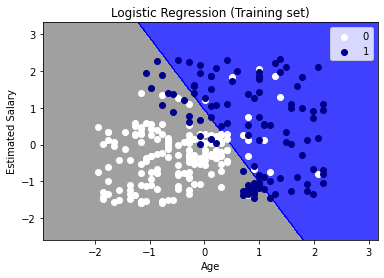

In [12]:
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, Y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, Classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('grey','blue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('white', 'darkblue'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

#Accuracy

In [13]:
print(confusion_matrix(Y_test,Pred_Y))
print(classification_report(Y_test,Pred_Y))

[[74  5]
 [11 30]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120

